## Importing Libraries

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay

## Data Preprocessing

In [54]:
# reading the data 
data = pd.read_csv("CurrentPopulationSurvey.csv")

In [55]:
#important columns to be considered
# year: Survey year
# age: age_lbl Age
# sex: sex_lbl Sex (1=male, 2=female)
# marst: marst_lbl Marital status (Married, spouse present=1, Married, spouse absent=2, Separated=3, Divorced=4, Widowed=5, Never mar=6)
# educ99: educ99_lbl Educational attainment, 1990, available for 1999 and later (No school=1, 1st-4th g=4, 5th-8th g=5, 9th grade=6, 10th grad=7, 11th grad=8, 12th grad=9, High scho=10, Some coll=11, Associate=13, Associate=14, Bachelors=15, Masters d=16, Professio=17, Doctorate=18)
# occ: occ_lbl Occupation
# wkswork1: wkswork1_lbl Weeks worked last year
# uhrswork: uhrswork_lbl Usual hours worked per week (last yr)
# incwage: incwage_lbl Wage and salary income

In [56]:
# Sslecting important columns
required_columns = ["year", "sex", "age", "marst", "educ99", "occ", "wkswork1", "uhrswork", "incwage"]

In [57]:
# copying the required columns into a new dataframe
required_data = data[required_columns].copy()
required_data['sex'] = required_data['sex'].replace({2: 'Female',1: 'Male'})
required_data.head()

,year,sex,age,marst,educ99,occ,wkswork1,uhrswork,incwage
0,1990,Male,58,6,NaN,335,52,35,14200.0
1,2009,Male,28,6,10.0,5120,52,40,17680.0
2,1990,Male,37,6,NaN,217,52,40,28000.0
3,1990,Male,34,6,NaN,64,47,45,27500.0
4,1981,Male,38,1,NaN,245,52,40,17000.0


In [58]:
# counting the number of empty cells 
empty_cells = required_data.isnull().sum()
empty_cells

year            0
sex             0
age             0
marst           0
educ99      87412
occ             0
wkswork1        0
uhrswork        0
incwage         0
dtype: int64

In [59]:
# removing the empty cells rows
filtered_data = required_data.dropna()
filtered_data

,year,sex,age,marst,educ99,occ,wkswork1,uhrswork,incwage
1,2009,Male,28,6,10.0,5120,52,40,17680.0
5,1999,Male,37,1,11.0,424,52,40,42000.0
6,2007,Male,44,1,15.0,7750,52,80,33000.0
8,1999,Male,41,1,10.0,308,52,40,30000.0
9,2011,Male,55,1,10.0,9620,52,40,67000.0
...,...,...,...,...,...,...,...,...,...
344280,1999,Female,34,1,10.0,337,52,40,17000.0
344281,2013,Female,45,3,11.0,7800,52,32,23000.0
344283,1999,Female,27,1,10.0,13,9,40,3200.0
344285,2007,Female,49,1,18.0,2860,25,10,8800.0


In [60]:
filtered_data.to_csv('data.csv', index=False) 

## Correlation Matrix

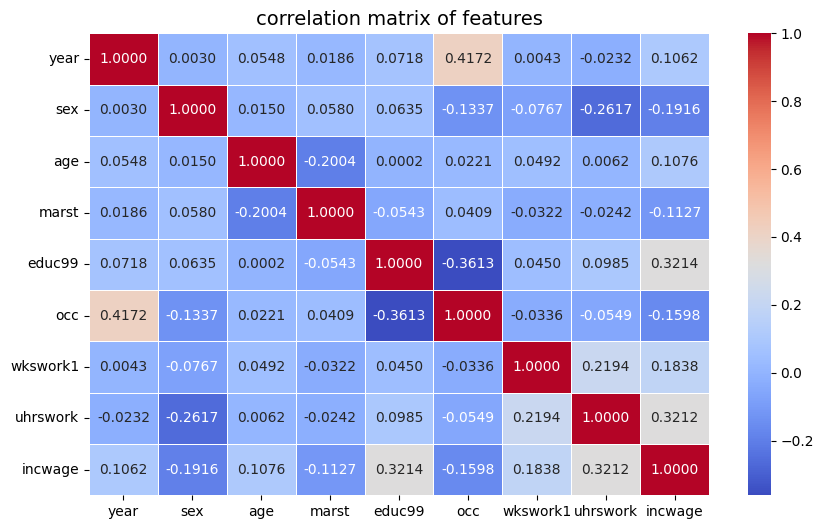

In [61]:
# correlation matrix
df = filtered_data.copy()
#converting male to 1 and female to 2,changing data type
df['sex'] = df['sex'].map({'Male': 1, 'Female': 2}).astype(int)
correlation_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".4f", cmap="coolwarm", linewidths=0.5)
plt.title('correlation matrix of features', fontsize=14)
plt.show()

## Plotting Income comparison of gender over the years

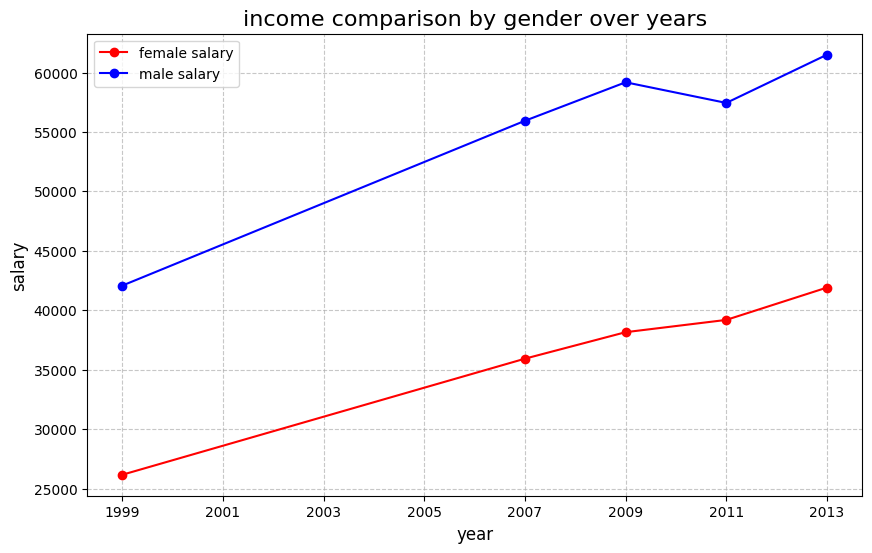

In [62]:
# plotting income comparison of gender over the years
df = filtered_data[["year", "sex", "incwage"]].copy()

df = df.groupby(['year', 'sex'], as_index=False).mean()

pivot_df = df.pivot(index='year', columns='sex', values='incwage')

plt.figure(figsize=(10, 6))

plt.plot(pivot_df.index, pivot_df['Female'], marker='o', label='female salary', color='red')

plt.plot(pivot_df.index, pivot_df['Male'], marker='o', label='male salary', color='blue')

x_ticks = range(pivot_df.index.min(), pivot_df.index.max() + 1, 2)
plt.xticks(ticks=x_ticks, fontsize=12)

plt.title('income comparison by gender over years', fontsize=16)
plt.xlabel('year', fontsize=12)
plt.ylabel('salary', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

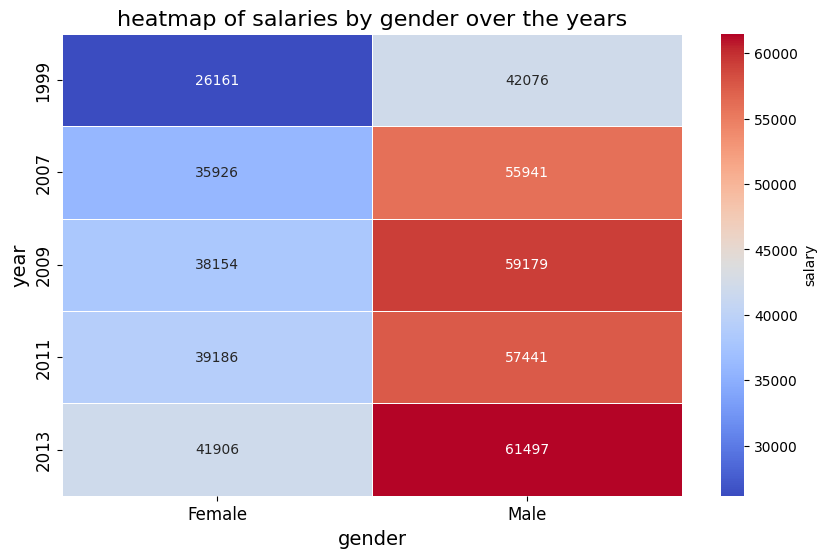

In [63]:
# plotting heatmap of income by gender over the years
heatmap_df = pivot_df.copy()
heatmap_df.columns = ['Female', 'Male']  
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_df, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5, cbar_kws={'label': 'salary'})

plt.title('heatmap of salaries by gender over the years', fontsize=16)
plt.xlabel('gender', fontsize=14)
plt.ylabel('year', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Plotting Income comparison of gender over Education Level

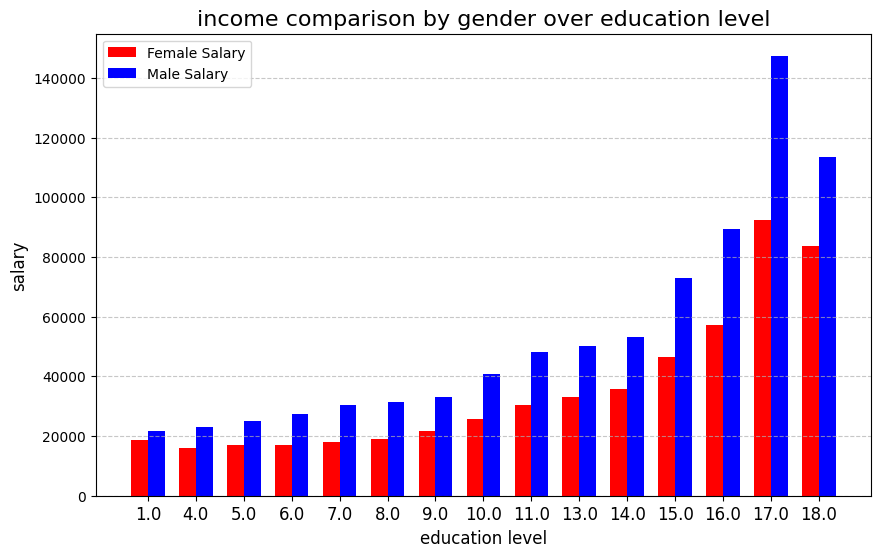

In [64]:
# plotting income comparison of gender over education Levels
df = filtered_data[["educ99", "sex", "incwage"]].copy()

df = df.groupby(['educ99', 'sex'], as_index=False).mean()

pivot_df = df.pivot(index='educ99', columns='sex', values='incwage')

education_levels = pivot_df.index
male_salaries = pivot_df['Male']
female_salaries = pivot_df['Female']

x = np.arange(len(education_levels))  
width = 0.35  

plt.figure(figsize=(10, 6))
plt.bar(x - width / 2, female_salaries, width, label='Female Salary', color='red')
plt.bar(x + width / 2, male_salaries, width, label='Male Salary', color='blue')

plt.title('income comparison by gender over education level', fontsize=16)
plt.xlabel('education level', fontsize=12)
plt.ylabel('salary', fontsize=12)
plt.xticks(x, education_levels, fontsize=12) 
plt.yticks(fontsize=10)
plt.legend(fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

## Plotting Income comparison of gender over Marital Status

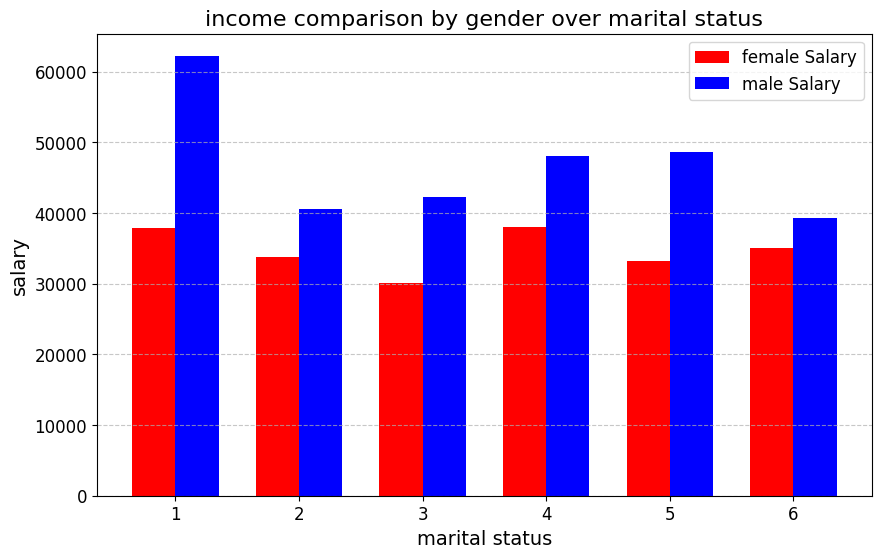

In [65]:
# plotting income comparison of gender over marital status
df = filtered_data[["marst", "sex", "incwage"]].copy()

df = df.groupby(['marst', 'sex'], as_index=False).mean()

pivot_df = df.pivot(index='marst', columns='sex', values='incwage')

education_levels = pivot_df.index
male_salaries = pivot_df['Male']
female_salaries = pivot_df['Female']

x = np.arange(len(education_levels))  
width = 0.35  

plt.figure(figsize=(10, 6))
plt.bar(x - width / 2, female_salaries, width, label='female Salary', color='red')
plt.bar(x + width / 2, male_salaries, width, label='male Salary', color='blue')

plt.title('income comparison by gender over marital status', fontsize=16)
plt.xlabel('marital status', fontsize=14)
plt.ylabel('salary', fontsize=14)
plt.xticks(x, education_levels, fontsize=12) 
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

## Plotting Income comparison of gender over top 7 occupations

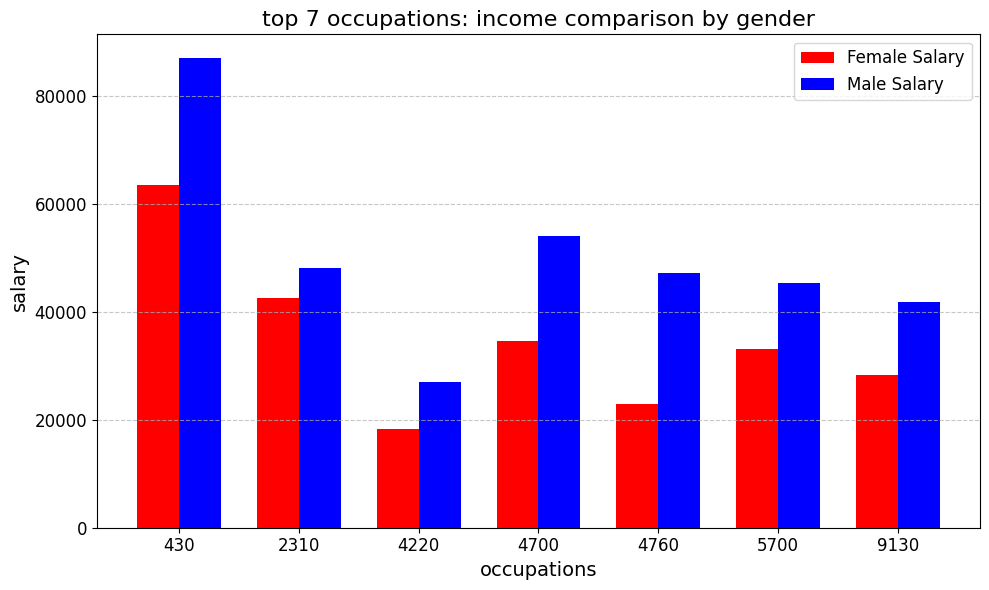

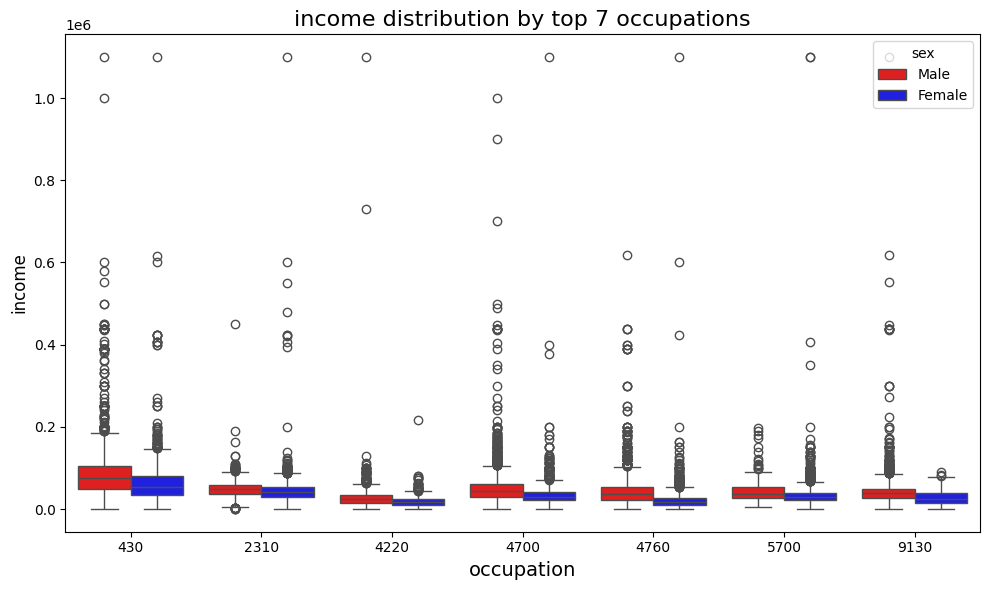

In [66]:
# plotting income comparison of gender over top 7 occupations
top_7_occupations = filtered_data["occ"].value_counts().head(7).index.tolist()
df = filtered_data[["occ", "sex", "incwage"]].copy()
df = df.groupby(["occ", "sex"], as_index=False).mean()
filtered_df = df[df["occ"].isin(top_7_occupations)]

pivot_df = filtered_df.pivot_table(index='occ', columns='sex', values='incwage')

occupation_labels = pivot_df.index
male_salaries = pivot_df["Male"] 
female_salaries = pivot_df["Female"]

x = np.arange(len(occupation_labels))
width = 0.35  

plt.figure(figsize=(10, 6))
plt.bar(x - width / 2, female_salaries, width, label='Female Salary', color='red')
plt.bar(x + width / 2, male_salaries, width, label='Male Salary', color='blue')

plt.title('top 7 occupations: income comparison by gender', fontsize=16)
plt.xlabel('occupations', fontsize=14)
plt.ylabel('salary', fontsize=14)
plt.xticks(x, occupation_labels, fontsize=12) 
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#plotting the box diagram for the same 
plt.figure(figsize=(10, 6))
top_occupations = filtered_data["occ"].value_counts().head(7).index
sns.boxplot(data=filtered_data[filtered_data["occ"].isin(top_occupations)], 
            x="occ", y="incwage",hue="sex", palette=["red", "blue"])
plt.title('income distribution by top 7 occupations', fontsize=16)
plt.xlabel('occupation', fontsize=14)
plt.ylabel('income', fontsize=12)
plt.tight_layout()
plt.show()


## Plotting Income comparison of gender over ages

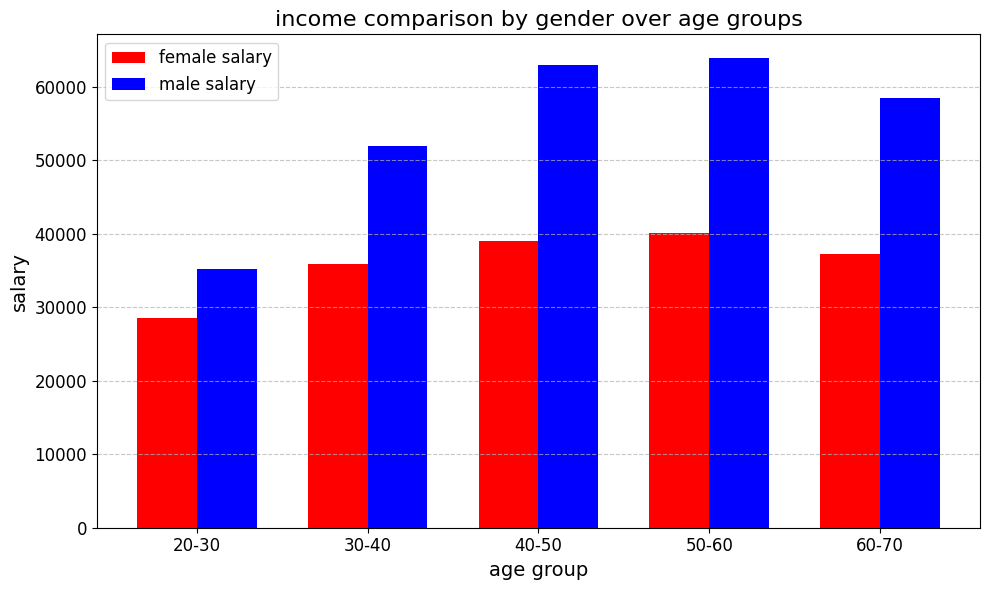

In [67]:
# plotting income comparison of gender over ages
df = filtered_data[["age", "sex", "incwage"]].copy()

age_labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
age_bins = [20, 30, 40, 50, 60, 70, 80]
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

df_grouped = df.groupby(['age_group', 'sex'], as_index=False, observed=False).mean()

pivot_df = df_grouped.pivot_table(index='age_group', columns='sex', values='incwage', observed=False)

age_groups = pivot_df.index
male_salaries = pivot_df["Male"]
female_salaries = pivot_df["Female"]

x = np.arange(len(age_groups))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width / 2, female_salaries, width, label='female salary', color='red')
plt.bar(x + width / 2, male_salaries, width, label='male salary', color='blue')

plt.title('income comparison by gender over age groups', fontsize=16)
plt.xlabel('age group', fontsize=14)
plt.ylabel('salary', fontsize=14)
plt.xticks(x, age_groups, fontsize=12) 
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Plotting Income comparison of gender over Hours Worked per week

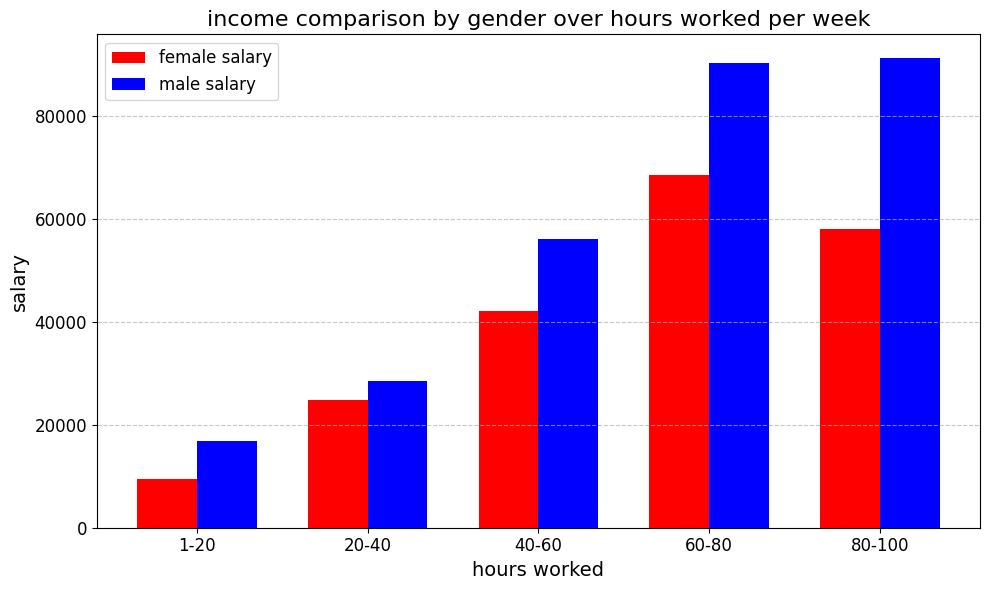

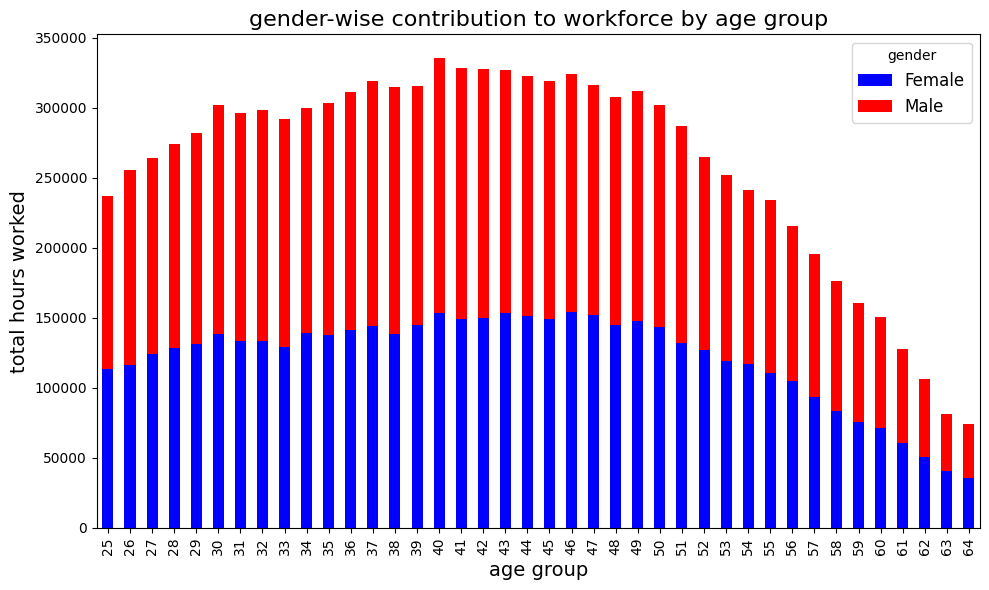

In [68]:
# plotting income comparison of gender over hours worked per week
df = filtered_data[["uhrswork", "sex", "incwage"]].copy()

hours_worked_bins = [1, 20, 40, 60, 80, 100]
hours_worked_labels = ['1-20', '20-40', '40-60', '60-80', '80-100']
df['hours_group'] = pd.cut(df['uhrswork'], bins=hours_worked_bins, labels=hours_worked_labels, right=False)

df_grouped = df.groupby(['hours_group', 'sex'], as_index=False, observed=False).mean()

pivot_df = df_grouped.pivot_table(index='hours_group', columns='sex', values='incwage', observed=False)

hours_groups = pivot_df.index
male_salaries = pivot_df["Male"]
female_salaries = pivot_df["Female"]

x = np.arange(len(hours_groups))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width / 2, female_salaries, width, label='female salary', color='red')
plt.bar(x + width / 2, male_salaries, width, label='male salary', color='blue')

plt.title('income comparison by gender over hours worked per week', fontsize=16)
plt.xlabel('hours worked', fontsize=14)
plt.ylabel('salary', fontsize=14)
plt.xticks(x, hours_groups, fontsize=12) 
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# plotting gender-wise contribution to workforce by age group
gender_hours = filtered_data.groupby(['age', 'sex'])['uhrswork'].sum().unstack()

gender_hours.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'red'])
plt.title('gender-wise contribution to workforce by age group', fontsize=16)
plt.xlabel('age group', fontsize=14)
plt.ylabel('total hours worked', fontsize=14)
plt.legend(title='gender', fontsize=12)
plt.tight_layout()
plt.show()

## Plotting Income comparison of gender over Weeks Worked per year

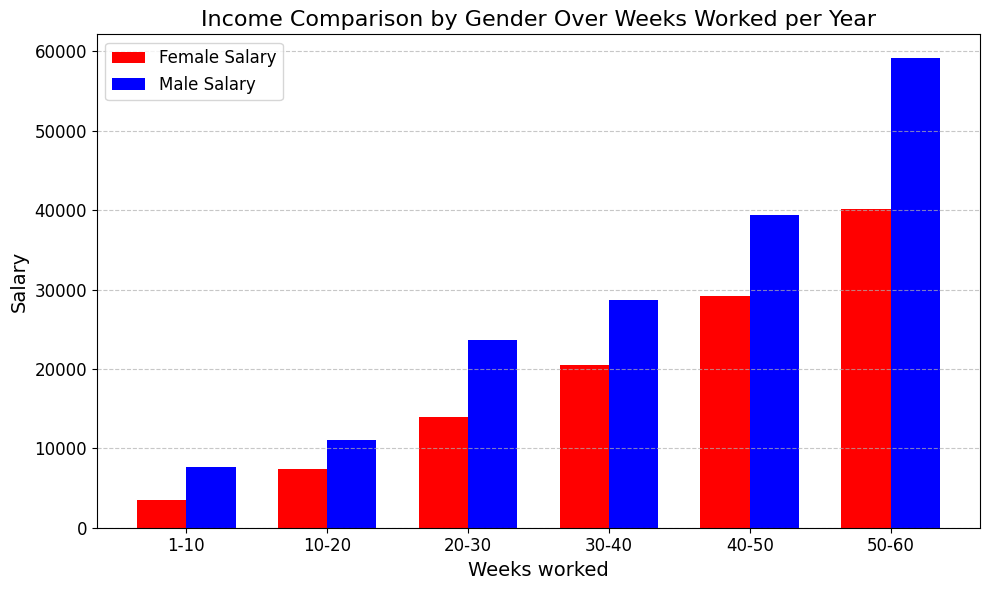

In [69]:
# Plotting Income comparison of gender over Weeks Worked per year
df = filtered_data[["wkswork1", "sex", "incwage"]].copy()

weeks_worked_bins = [1, 10, 20, 30, 40, 50, 60]
weeks_worked_labels = ['1-10', '10-20', '20-30', '30-40', '40-50', '50-60']
df['weeks_group'] = pd.cut(df['wkswork1'], bins=weeks_worked_bins, labels=weeks_worked_labels, right=False)

df_grouped = df.groupby(['weeks_group', 'sex'], as_index=False, observed=False).mean()

pivot_df = df_grouped.pivot_table(index='weeks_group', columns='sex', values='incwage', observed=False)

weeks_groups = pivot_df.index
male_salaries = pivot_df["Male"]
female_salaries = pivot_df["Female"]

x = np.arange(len(weeks_groups))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width / 2, female_salaries, width, label='Female Salary', color='red')
plt.bar(x + width / 2, male_salaries, width, label='Male Salary', color='blue')

plt.title('Income Comparison by Gender Over Weeks Worked per Year', fontsize=16)
plt.xlabel('Weeks worked', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.xticks(x, weeks_groups, fontsize=12) 
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Plotting Income comparison of gender 

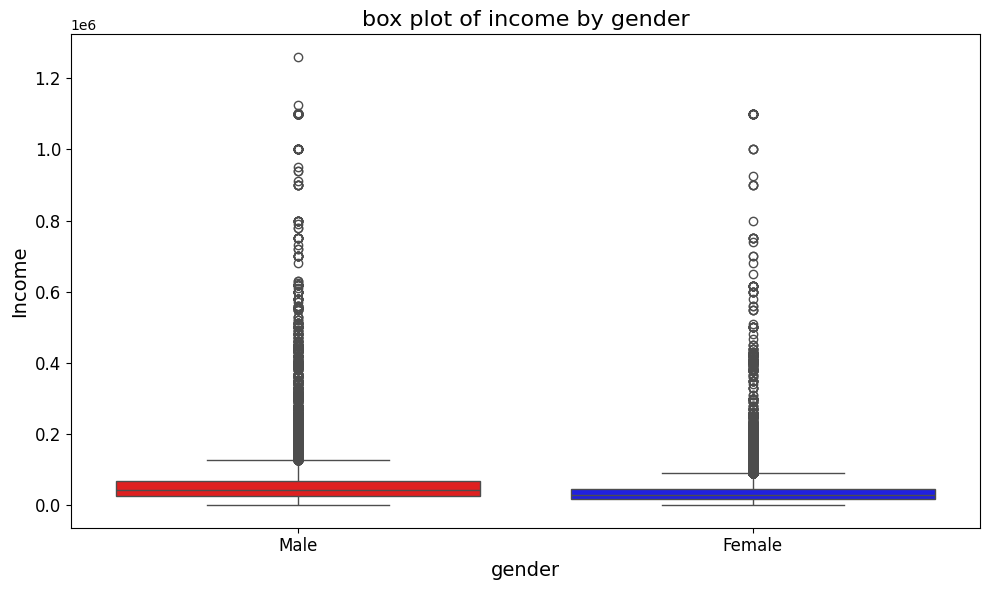

In [70]:
# plotting income comparison of gender 
df = filtered_data[["sex", "incwage"]].copy()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sex', y='incwage',  hue='sex', dodge=False, legend=False,palette=["red", "blue"])

plt.title('box plot of income by gender', fontsize=16)
plt.xlabel('gender', fontsize=14)
plt.ylabel('Income', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

In [71]:
df_mean = df.groupby(["sex"], as_index=False).mean()
df_mean

,sex,incwage
0,Female,36948.014493
1,Male,56091.212303


## Sampling from the data

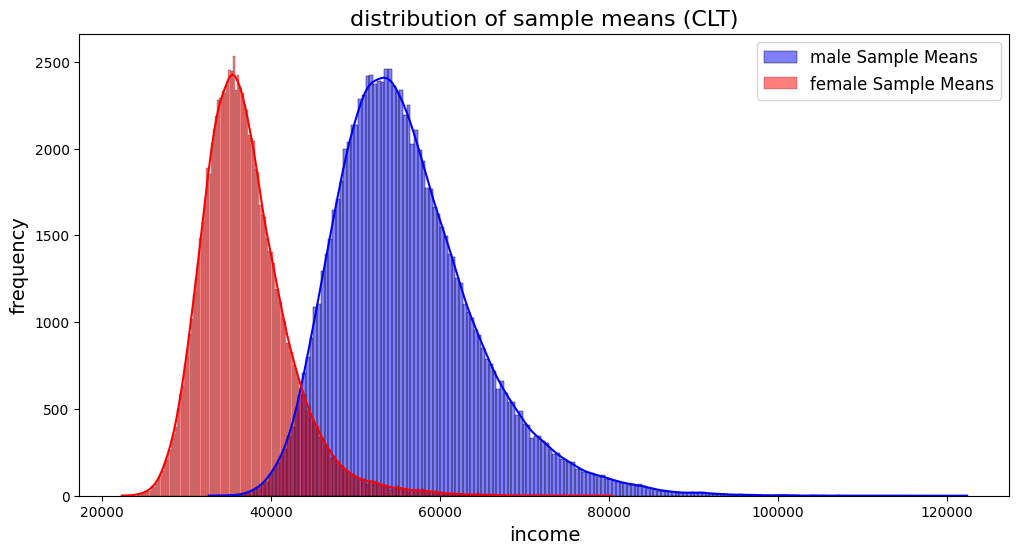

In [72]:
# sampling from the data 
male_income = df[df['sex'] == 'Male']['incwage'].dropna()
female_income = df[df['sex'] == 'Female']['incwage'].dropna()

sample_size = 50

male_income_samples = [
    np.mean(np.random.choice(male_income, sample_size, replace=True))
    for _ in range(100000)  
]
female_income_samples = [
    np.mean(np.random.choice(female_income, sample_size, replace=True))
    for _ in range(100000)
]

plt.figure(figsize=(12, 6))
sns.histplot(male_income_samples, kde=True, color='blue', label='male Sample Means')
sns.histplot(female_income_samples, kde=True, color='red', label='female Sample Means')
plt.title('distribution of sample means (CLT)', fontsize=16)
plt.xlabel('income', fontsize=14)
plt.ylabel('frequency', fontsize=14)
plt.legend(fontsize=12)
plt.show()

## Hypothesis Testing

In [73]:
# hypothesis tesing
t_stat, p_value = ttest_ind(male_income_samples, female_income_samples, equal_var=False)

print("t-statistic:", t_stat)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("reject the null hypothesis: there is a significant difference in income between males and females.")
else:
    print("fail to reject the null hypothesis: no significant difference in income between males and females.")


t-statistic: 617.4158732616324
p-value: 0.0
reject the null hypothesis: there is a significant difference in income between males and females.


## Logistic Regression to predict gender

logistic regression results-
Coefficients: [[ 0.25738673  0.13227291  0.09234548  0.24775215 -0.4741471   0.03332919
  -0.46953673 -0.87148976]]
Intercept: [-0.06249606]
Train Accuracy: 0.6753138686131387
Test Accuracy: 0.6820048661800486


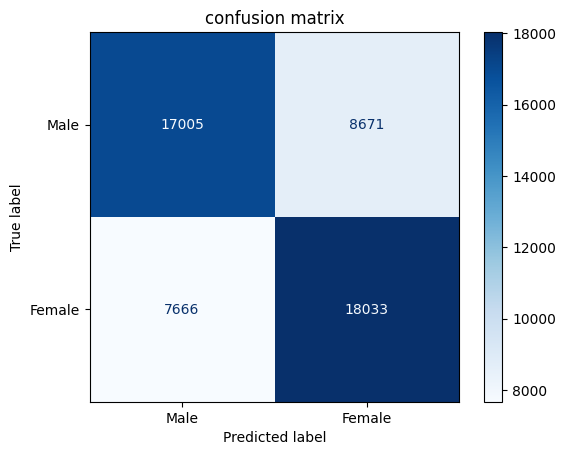

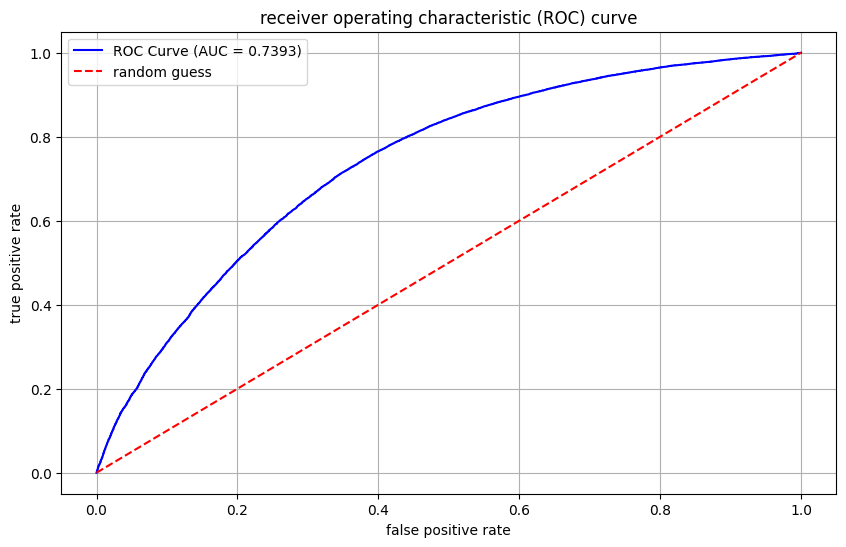

In [74]:
# logistic regression
columns = ["year", "age", "marst", "educ99", "occ", "wkswork1", "uhrswork", "incwage"]
X = filtered_data[columns].copy()
y = filtered_data["sex"].copy()  
y = y.map({'Male': 0, 'Female': 1}).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

regressor = LogisticRegression()
regressor.fit(X_train_scaled, y_train)

y_train_pred = regressor.predict(X_train_scaled)
y_test_pred = regressor.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("logistic regression results-")
print(f"Coefficients: {regressor.coef_}")
print(f"Intercept: {regressor.intercept_}")
print(f"Train Accuracy: {train_accuracy}")

print(f"Test Accuracy: {test_accuracy}")

# building the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Male', 'Female'])
disp.plot(cmap='Blues')
plt.title('confusion matrix')
plt.show()

# building the roc curve
y_test_proba = regressor.predict_proba(X_test_scaled)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = roc_auc_score(y_test, y_test_proba)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='random guess')
plt.title('receiver operating characteristic (ROC) curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.grid(True)
plt.show()

## Linear Regression to predict income

linear regression results-
Coefficients: [ 7462.90368887 -7777.38561083  4362.64196014 -3056.18763971
 11978.39633704 -6988.62419165  4926.81967616 11366.47041901]
Intercept: 46548.64976155731
Train R-Squared: 0.25122186778869626
Test R-Squared: 0.260632860285852


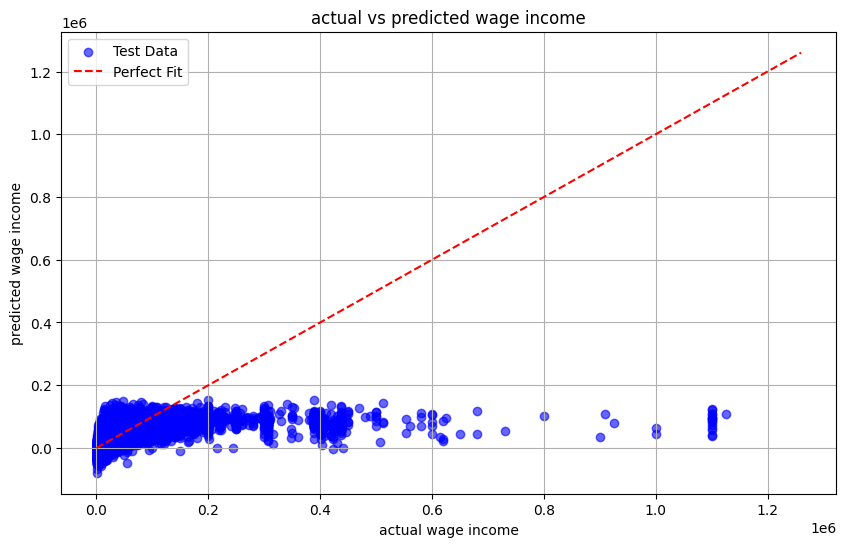

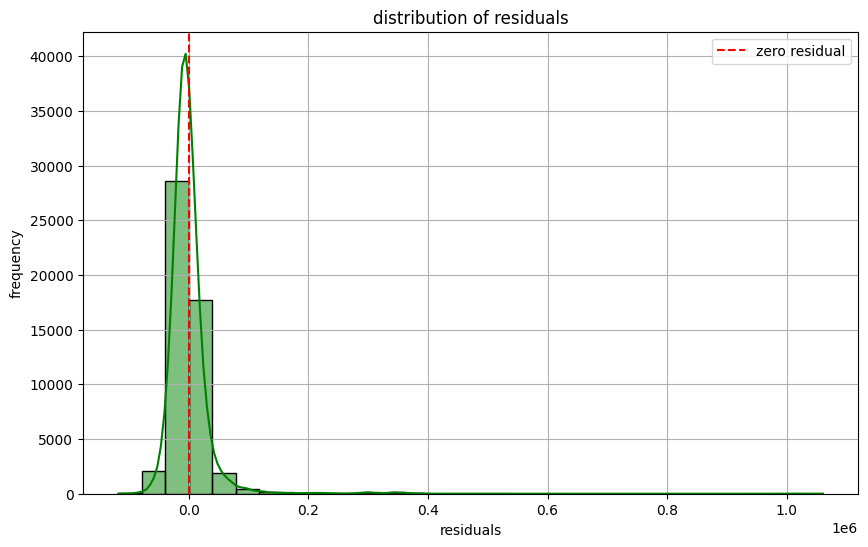

In [75]:
# linear regression
features = ["year", "sex", "age", "marst", "educ99", "occ", "wkswork1", "uhrswork"]
X = filtered_data[features].copy()
X['sex'] = X['sex'].map({'Male': 1, 'Female': 2}).astype(int)

y = filtered_data["incwage"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

y_train_pred = regressor.predict(X_train_scaled)
y_test_pred = regressor.predict(X_test_scaled)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("linear regression results-")
print(f"Coefficients: {regressor.coef_}")
print(f"Intercept: {regressor.intercept_}")
print(f"Train R-Squared: {train_r2}")
print(f"Test R-Squared: {test_r2}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='blue', label='Test Data')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Perfect Fit')
plt.title('actual vs predicted wage income')
plt.xlabel('actual wage income')
plt.ylabel('predicted wage income')
plt.legend()
plt.grid(True)
plt.show()

# residuals plot
test_residuals = y_test - y_test_pred

plt.figure(figsize=(10, 6))
sns.histplot(test_residuals, kde=True, color='green', bins=30)
plt.title('distribution of residuals')
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.axvline(0, color='red', linestyle='--', label='zero residual')
plt.legend()
plt.grid(True)
plt.show()

## PCA

C:\Users\vesud\AppData\Local\Temp\ipykernel_28632\2135196960.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[:, 'PCA1'] = PCA1
C:\Users\vesud\AppData\Local\Temp\ipykernel_28632\2135196960.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[:, 'PCA2'] = PCA2


Explained Variance Ratio for each component: [0.25542686 0.17423086]
Total Variance Explained: 0.4296577139342546


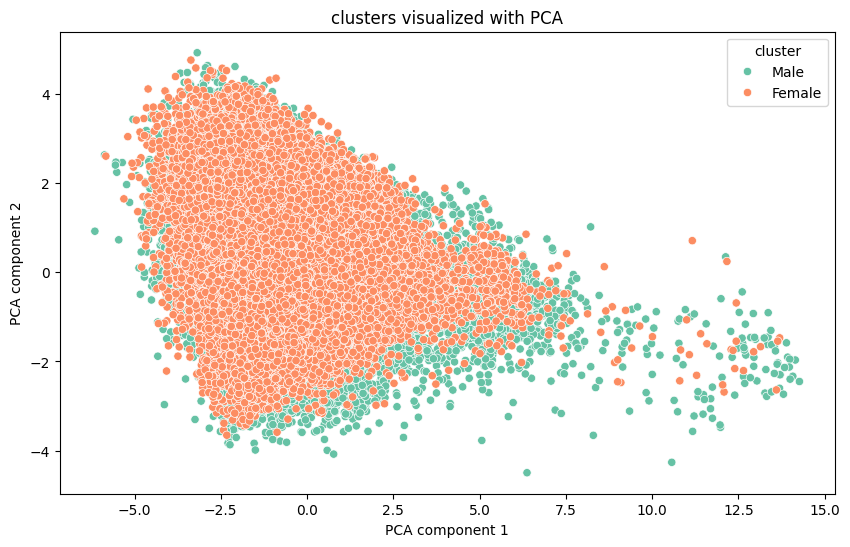

In [76]:
# PCA
features = ["age", "marst", "educ99", "occ", "wkswork1", "uhrswork", "incwage"]
X = filtered_data[features].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
features_pca = pca.fit_transform(X_scaled)

PCA1 = features_pca[:, 0]
PCA2 = features_pca[:, 1]
filtered_data.loc[:, 'PCA1'] = PCA1
filtered_data.loc[:, 'PCA2'] = PCA2

explained_variance = pca.explained_variance_ratio_
total_variance_explained = explained_variance.sum()

print(f"Explained Variance Ratio for each component: {explained_variance}")
print(f"Total Variance Explained: {total_variance_explained}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=PCA1, y=PCA2, hue="sex", palette="Set2", data=filtered_data)
plt.title("clusters visualized with PCA")
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.legend(title="cluster")
plt.show()

## Creating a dataframe that contains year wise % gap in income

In [77]:
# grouping by year and sex, and calculating mean income
grouped = filtered_data.groupby(['year', 'sex'])['incwage'].mean().reset_index()

pivot = grouped.pivot(index='year', columns='sex', values='incwage')

pivot['income_difference'] = ((pivot['Male'] - pivot['Female']) / (pivot['Male'] + pivot['Female'])) * 100

income_difference_df = pivot[['income_difference']].reset_index()

income_difference_df

sex,year,income_difference
0,1999,23.323056
1,2007,21.787065
2,2009,21.601420
3,2011,18.892600
4,2013,18.945799


## Applying Linear regression to predict % gap in income 

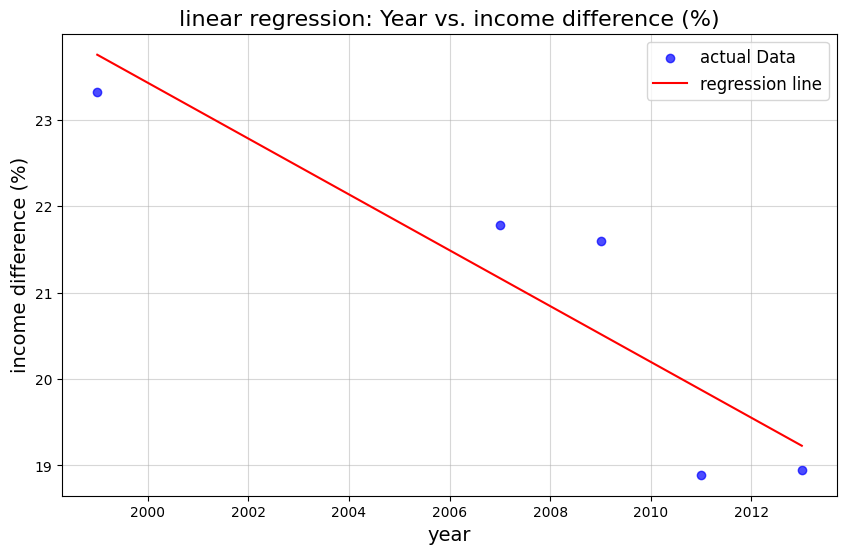

The year when the income difference is expected to be zero: 2072.45


In [78]:
# fitting linear regression on year to predict income difference
X = income_difference_df[['year']].values 
y = income_difference_df['income_difference'].values  

regressor = LinearRegression()
regressor.fit(X, y)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='actual Data', alpha=0.7)
plt.plot(X, regressor.predict(X), color='red', label='regression line')
plt.title('linear regression: Year vs. income difference (%)', fontsize=16)
plt.xlabel('year', fontsize=14)
plt.ylabel('income difference (%)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.show()

slope = regressor.coef_[0]
intercept = regressor.intercept_

year_zero_difference = -intercept / slope
print(f"The year when the income difference is expected to be zero: {year_zero_difference:.2f}")